In [161]:
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

## Est-ce qu'un ANN peur apprendre à dire si un eleve a son bac ou pas

### Création d'un dataset d'élèves, de notes et leur résultat au bac

In [162]:
# Je veux créer une matrice avec 4 lignes(dont chacune represente une matière) 
#et 200 colonnes pour les exemples d'éleves
n_matieres   = 4
n_eleves     = 200
note_maximal = 20
X = np.random.randint(note_maximal + 1, # pour retourner des nombres entre 0 et 20 (inclus)
                      size=(n_matieres,
                            n_eleves))
X.shape

(4, 200)

In [163]:
# A partir de notre dataset X, je crée mon label Y qui renvoie aux résultats des élèves 
#c'est à dire s'ils passent le bac ou pas

# Création d'un Bac fictif
coeffs = np.array([2, 4, 2, 6])
coeffs = coeffs.reshape(4, 1)

# On calcule le score en faisant la somme des notes * coeffs pour chaque élève
scores_bac = np.dot(X.T, coeffs)

moyennes = scores_bac/np.sum(coeffs)

#Pour avoir une matrice composée de 0(si l'éleve n'a pas le bac) et 1(s'il a le bac) 
Y = (moyennes>=10)*1


Y.shape

(200, 1)

## Architecture du RNN

In [164]:
def init_parametres(n_features_x,
                    n_neuron_l1,
                    n_neuron_l2,
                    n_neuron_last):

    W1 = np.random.randn(n_features_x, n_neuron_l1)*0.01
    b1 = np.zeros((1, n_neuron_l1))
    
    
    W2 = np.random.randn(n_neuron_l1, n_neuron_l2)*0.01
    b2 = np.zeros((1, n_neuron_l2))
    
    
    W3 = np.random.randn(n_neuron_l2, n_neuron_last)*0.01
    b3 = np.zeros((1, n_neuron_last ))
    
    #creation d'un dictionnaire pour stocker les résultats de mes parametres
    parametres = {"W1" : W1,
                 "W2" : W2,
                 "W3" : W3,
                 "b1" : b1,
                 "b2" : b2, 
                 "b3" : b3}

    return parametres

In [165]:
# Mon RNN aura 3 layers: 1 input layer(3), 1, hidden layer(3) et 1 output layer(1)
#JE crée la fonction initialisation des parametres


n_fx    = X.shape[0]
n_n1    = 3
n_n2    = 3
n_nlast = 1  # On prédit deux classes donc on a besoin que d'un neurone en sortie (classif binaire)

parametres = init_parametres(n_fx, n_n1, n_n2, n_nlast)

In [166]:
parametres

{'W1': array([[ 0.00741522, -0.00591582, -0.00512312],
        [ 0.01449234,  0.00514922, -0.00769283],
        [-0.00536161, -0.0009627 , -0.00305449],
        [ 0.00813797,  0.01201154, -0.01163492]]),
 'W2': array([[ 0.00604435, -0.00116414, -0.02116459],
        [-0.00131299, -0.01751616,  0.01428177],
        [-0.00230191,  0.00088198, -0.00353956]]),
 'W3': array([[-0.00883346],
        [-0.01140362],
        [ 0.02096741]]),
 'b1': array([[0., 0., 0.]]),
 'b2': array([[0., 0., 0.]]),
 'b3': array([[0.]])}

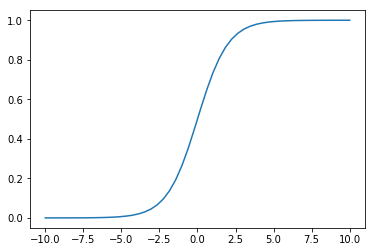

In [167]:
def sigmoid(z):
    S = 1/(1+ np.exp(-z))
    return S

ligne = np.linspace(-10,10)
plt.plot(ligne, sigmoid(ligne))

In [168]:
def forward_pass(X, parametres):
    cache = {}
    
    W1 = parametres["W1"] 
    W2 = parametres["W2"] 
    W3 = parametres["W3"] 
    b1 = parametres["b1"] 
    b2 = parametres["b1"] 
    b3 = parametres["b3"]
    
    
    Z1 = np.dot(X.T, W1)+ b1
    A1 = sigmoid(Z1)
    Z2 = np.dot(A1, W2)+ b2
    A2 = sigmoid(Z2)
    Z3 = np.dot(A2, W3)+ b3
    A3 = sigmoid(Z3)
    
    cache["Z1"] =Z1
    cache["Z2"] =Z2
    cache["Z3"] =Z3
    cache["A1"] =A1
    cache["A2"] =A2
    cache["A3"] =A3

    
    return A3, cache

In [169]:
A3, cache = forward_pass(X, parametres)
cache

{'Z1': array([[ 0.16705198, -0.01955413, -0.14184809],
        [ 0.3120601 ,  0.25221364, -0.31858244],
        [ 0.44380779,  0.12308517, -0.34684109],
        [ 0.22666623,  0.07793552, -0.33731785],
        [ 0.25101217,  0.03699843, -0.25415095],
        [ 0.06268323,  0.18515453, -0.25652511],
        [ 0.1879368 ,  0.14711922, -0.24399992],
        [ 0.38488978,  0.16956414, -0.37927055],
        [ 0.22418628, -0.01670677, -0.20196046],
        [ 0.38908904,  0.1140993 , -0.3532182 ],
        [ 0.40471387,  0.2670908 , -0.36423834],
        [ 0.23878358,  0.25024797, -0.31601407],
        [ 0.21749382,  0.00713642, -0.20334913],
        [ 0.45213442,  0.16359344, -0.45181751],
        [ 0.12863669,  0.08312802, -0.10344396],
        [ 0.29285737,  0.0489331 , -0.21807496],
        [ 0.32794659,  0.18785177, -0.35159149],
        [ 0.2914153 ,  0.21940283, -0.2974795 ],
        [ 0.27624433,  0.25557709, -0.34558806],
        [ 0.13142732,  0.0049443 , -0.201287  ],
        [ 0.14

## Calcul cost

In [170]:
def cost(A3, Y):
    #pour calculer la cost j'ai besoin du nombre d'exemples: n_eleves, de la prediction:A3, du label Y
    Loss = np.multiply(np.log(A3), Y) + (1-Y) * np.log(1-A3)
    cost = -np.sum(Loss) / n_eleves
    
    return cost

In [171]:
cost(A3, Y)

0.6931418823753797

In [188]:
def backward(parametres, cache,Y ,m):
     
    
    #on recupere les parametres W1, W2, w3,
    W1 = parametres["W1"]
    W2 = parametres["W2"]
    W3 = parametres["W3"]
    
    #recuperation de A1, A2, A3 du cache
    A1 = cache["A1"]
    A2 = cache["A2"]
    A3 = cache["A3"]
    

    dZ3 = A3 - Y
    dW3 = np.dot(A2.T, dZ3)/m
    db3 = np.sum(dZ3, axis = 1, keepdims = True)/n_eleves
    
   
    dZ2 = np.dot( W3, dZ3.T) * (A2.T * (1 - A2.T))
    dW2 = np.dot(dZ2.T, A2.T)/m
    db2 = np.sum(dZ2, axis = 1, keepdims = True)/n_eleves
    
    dZ1 = np.multiply(np.dot( W2.T, dZ2 ), (A1.T* (1 - A1.T)))
    
    dW1 = np.dot(dZ1.T, A1.T)/m
    db1 = np.sum(dZ1, axis = 1, keepdims = True)/n_eleves
    
    #je  stocke les resultats des dérivées de parametres dans un dictionnaire
    grads = {"dW1": dW1,
             "dW2" : dW2,
             "dW3" : dW3,
             "db1" : db1,
             "db2" : db2,
             "db1" : db1}
    
    return grads
# print(W2.T.shape, dZ2.T.shape, A1.T.shape)

In [189]:
grads = backward(parametres, cache,Y,n_eleves)
grads

{'dW1': array([[ 6.77237719e-09,  9.04569477e-09,  7.52946080e-09, ...,
          9.07474679e-09,  8.55454758e-09,  8.42681991e-09],
        [-6.69077350e-09, -8.92693559e-09, -7.43535738e-09, ...,
         -8.95462615e-09, -8.44380014e-09, -8.31748449e-09],
        [-7.09262293e-09, -9.36758835e-09, -7.87230846e-09, ...,
         -9.38430259e-09, -8.89583497e-09, -8.74070833e-09],
        ...,
        [-6.73022945e-09, -8.96871271e-09, -7.46686978e-09, ...,
         -8.99644667e-09, -8.47776341e-09, -8.35787915e-09],
        [-6.99774376e-09, -9.24776335e-09, -7.76781798e-09, ...,
         -9.26494898e-09, -8.78022600e-09, -8.62816687e-09],
        [-6.79580372e-09, -9.05078409e-09, -7.54282919e-09, ...,
         -9.07764617e-09, -8.56048276e-09, -8.43505583e-09]]),
 'dW2': array([[ 2.22201275e-07,  2.25332311e-07,  2.20444492e-07, ...,
          2.26178152e-07,  2.22226087e-07,  2.24853754e-07],
        [-2.22150592e-07, -2.25280496e-07, -2.20394427e-07, ...,
         -2.26126037e-07

## Update parametres backward

In [ ]:
def update parametres(parametres , grads, learning_rate = 0.05):
    